# Brain Tumor MRI Image Processing and Classification


# -Import Libraries and Display Sample Image

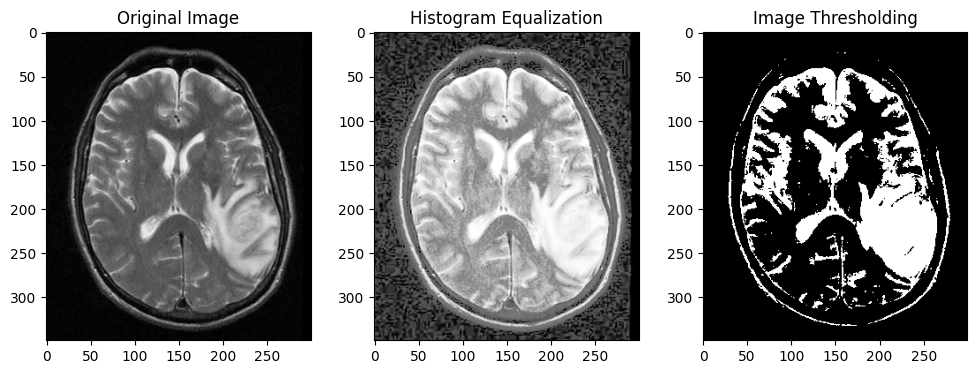

In [8]:
import cv2
import matplotlib.pyplot as plt

# Load a sample image from the Brain Tumor MRI Dataset (replace with your image path)
img = cv2.imread('C:\\Users\\owd1\\OneDrive\\Desktop\\Image Pocessing Final Project\\Images\\yes\\Y71.JPG', cv2.IMREAD_GRAYSCALE)
# Histogram Equalization
equ = cv2.equalizeHist(img)
# Image Thresholding (adaptive thresholding is used here)
_, thresholded = cv2.threshold(equ, 200, 255, cv2.THRESH_BINARY)

# Display original, equalized, and thresholded images
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(equ, cmap='gray')
plt.title('Histogram Equalization')

plt.subplot(133)
plt.imshow(thresholded, cmap='gray')
plt.title('Image Thresholding')

plt.show()

# -Image Processing Function

In [9]:
import cv2
import os

# Function to check if the file is an image
def is_image_file(filename):
    return filename.lower().endswith(('.png', '.jpg', '.jpeg'))

# Function to process and save an image
def process_and_save_image(image_path, equalized_dir, thresholded_dir, filename):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Warning: Unable to read {image_path}. Skipping.")
        return

    # Histogram Equalization
    equ = cv2.equalizeHist(img)
    # Image Thresholding
    _, thresholded = cv2.threshold(equ, 200, 255, cv2.THRESH_BINARY)

    # Save processed images
    cv2.imwrite(os.path.join(equalized_dir, filename), equ)
    cv2.imwrite(os.path.join(thresholded_dir, filename), thresholded)

# Directory paths
base_dir = 'C:\\Users\\owd1\\OneDrive\\Desktop\\Image Pocessing Final Project\\Images'
classes = ['yes', 'no']

# Directories for equalized and thresholded images
equalized_dir = os.path.join(base_dir, 'equalized')
thresholded_dir = os.path.join(base_dir, 'thresholded')

# Create directories if they don't exist
if not os.path.exists(equalized_dir):
    os.makedirs(equalized_dir)
if not os.path.exists(thresholded_dir):
    os.makedirs(thresholded_dir)

processed_count = 0

# Process images in each class
for class_name in classes:
    class_dir = os.path.join(base_dir, class_name)

    # Iterate through each image in the folder
    for filename in os.listdir(class_dir):
        if is_image_file(filename):  # Check for image files
            image_path = os.path.join(class_dir, filename)
            process_and_save_image(image_path, equalized_dir, thresholded_dir, filename)
            processed_count += 1

print(f"Processing complete. Processed {processed_count} images.")


Processing complete. Processed 247 images.


# -Import needed libraries for CNN

In [10]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
from sklearn.model_selection import train_test_split
from torchvision.io import read_image

# - CNN Model Definition and Training

In [11]:
# Read images and create dictionaries for both classes
image_data = []
for image_path in ["C:\\Users\\owd1\\OneDrive\\Desktop\\Image Pocessing Final Project\\Images\\no", "C:\\Users\\owd1\\OneDrive\\Desktop\\Image Pocessing Final Project\\Images\\yes"]:
    for filename in os.listdir(image_path):
        image = cv2.imread(os.path.join(image_path, filename), cv2.IMREAD_GRAYSCALE)
        image = cv2.equalizeHist(image)
        _, thresholded = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)
        image = cv2.resize(thresholded, (256, 256))  # Resize all images to 256x256
        label = 0 if image_path == 'C:\\Users\\owd1\\OneDrive\\Desktop\\Image Pocessing Final Project\\Images\\no' else 1
        image_dict = {'image': image, 'label': label}
        image_data.append(image_dict)

# Extract images and labels
X = [image_dict['image'] for image_dict in image_data]
y = [image_dict['label'] for image_dict in image_data]

# Convert X to a NumPy array before splitting the dataset
X = np.array(X)
y = np.array(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

# -Model Evaluation

Epoch [1/20], Loss: 0.6200, Accuracy: 42.13%
Epoch [2/20], Loss: 0.5438, Accuracy: 65.48%
Epoch [3/20], Loss: 0.5065, Accuracy: 81.73%
Epoch [4/20], Loss: 0.4892, Accuracy: 85.79%
Epoch [5/20], Loss: 0.4822, Accuracy: 87.82%
Epoch [6/20], Loss: 0.4799, Accuracy: 88.32%
Epoch [7/20], Loss: 0.4755, Accuracy: 89.85%
Epoch [8/20], Loss: 0.4727, Accuracy: 90.86%
Epoch [9/20], Loss: 0.4717, Accuracy: 90.86%
Epoch [10/20], Loss: 0.4716, Accuracy: 90.86%
Epoch [11/20], Loss: 0.4715, Accuracy: 90.86%
Epoch [12/20], Loss: 0.4706, Accuracy: 91.37%
Epoch [13/20], Loss: 0.4701, Accuracy: 91.37%
Epoch [14/20], Loss: 0.4691, Accuracy: 91.37%
Epoch [15/20], Loss: 0.4671, Accuracy: 92.39%
Epoch [16/20], Loss: 0.4676, Accuracy: 92.39%
Epoch [17/20], Loss: 0.4673, Accuracy: 92.39%
Epoch [18/20], Loss: 0.4670, Accuracy: 92.39%
Epoch [19/20], Loss: 0.4670, Accuracy: 92.39%
Epoch [20/20], Loss: 0.4670, Accuracy: 92.39%


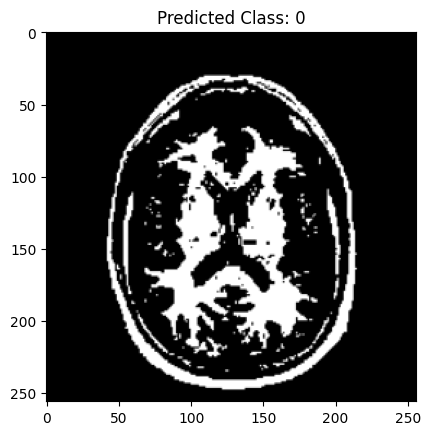

In [12]:
# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 128 * 128, 128)
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 32 * 128 * 128)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Calculate class weights
class_weights = torch.tensor([len(y_train) / (2 * torch.bincount(y_train_tensor.long()).numpy()[1])])

# Use Binary Cross Entropy Loss with class weights
criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights)

# Instantiate the model, loss function, and optimizer
model = SimpleCNN()
optimizer = optim.Adam(model.parameters(), lr=0.000001)

# Training loop with class weights
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train_tensor.unsqueeze(1))  # Add channel dimension
    loss = criterion(outputs, y_train_tensor.unsqueeze(1))  # Add dimension to target tensor

    # Convert outputs to binary predictions
    predicted_classes = (outputs > 0.5).float()

    # Calculate accuracy
    correct_predictions = (predicted_classes == y_train_tensor.unsqueeze(1)).float().sum()
    accuracy = correct_predictions / y_train_tensor.size(0) * 100  # Multiply by 100 for percentage

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item():.2f}%')
# Example prediction
sample_index = 0
sample_image = X_test_tensor[sample_index].unsqueeze(0).unsqueeze(1)  # Add channel dimension
prediction = model(sample_image)
predicted_class = 1 if prediction > 0.5 else 0

# Display the original image and its predicted class
plt.imshow(X_test[sample_index], cmap='gray')
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

In [13]:
def calculate_accuracy(model, X_test, y_test):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation
        correct = 0
        total = 0
        for i in range(len(X_test)):
            # Prepare the sample
            image = X_test[i].unsqueeze(0).unsqueeze(0).float()  # Add batch and channel dimensions
            label = y_test[i]


            # Make a prediction
            outputs = model(image)
            predicted = 1 if outputs.item() > 0.5 else 0

            # Update total and correct counts
            total += 1
            correct += (predicted == label)

        accuracy = 100 * correct / total
        return accuracy

# Call the function and print the accuracy
accuracy = calculate_accuracy(model, X_test_tensor, y_test_tensor)
print(f"Accuracy on test set: {accuracy:.2f}%")


Accuracy on test set: 78.00%
